<a href="https://colab.research.google.com/github/Najdawiali/Arabot-Projects-NLP/blob/main/Sentiments_analysis_Assignment0ne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
pip install kaggle

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [73]:
import os
os.makedirs(os.path.expanduser("~/.kaggle"), exist_ok=True)

In [74]:
!cp /content/drive/MyDrive/kaggle.json ~/.kaggle/kaggle.json

In [75]:
!chmod 600 ~/.kaggle/kaggle.json

In [76]:
!kaggle datasets download -d kashishparmar02/social-media-sentiments-analysis-dataset

Dataset URL: https://www.kaggle.com/datasets/kashishparmar02/social-media-sentiments-analysis-dataset
License(s): CC0-1.0
social-media-sentiments-analysis-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [77]:
!unzip social-media-sentiments-analysis-dataset.zip

Archive:  social-media-sentiments-analysis-dataset.zip
replace sentimentdataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [78]:
pip install emoji #installing emoji library to classify them later as needed

The following libraries were utilized to develop and implement the model:

In [130]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import emoji
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import pos_tag
from wordcloud import WordCloud
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

I used **the Social Media Sentiment Analysis Dataset** to analyze user interactions on social media platforms.

In [80]:
df = pd.read_csv('sentimentdataset.csv')

In [81]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
0,0,0,Enjoying a beautiful day at the park! ...,Positive,2023-01-15 12:30:00,User123,Twitter,#Nature #Park,15.0,30.0,USA,2023,1,15,12
1,1,1,Traffic was terrible this morning. ...,Negative,2023-01-15 08:45:00,CommuterX,Twitter,#Traffic #Morning,5.0,10.0,Canada,2023,1,15,8
2,2,2,Just finished an amazing workout! 💪 ...,Positive,2023-01-15 15:45:00,FitnessFan,Instagram,#Fitness #Workout,20.0,40.0,USA,2023,1,15,15
3,3,3,Excited about the upcoming weekend getaway! ...,Positive,2023-01-15 18:20:00,AdventureX,Facebook,#Travel #Adventure,8.0,15.0,UK,2023,1,15,18
4,4,4,Trying out a new recipe for dinner tonight. ...,Neutral,2023-01-15 19:55:00,ChefCook,Instagram,#Cooking #Food,12.0,25.0,Australia,2023,1,15,19


In [82]:
df.shape

(732, 15)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0.1  732 non-null    int64  
 1   Unnamed: 0    732 non-null    int64  
 2   Text          732 non-null    object 
 3   Sentiment     732 non-null    object 
 4   Timestamp     732 non-null    object 
 5   User          732 non-null    object 
 6   Platform      732 non-null    object 
 7   Hashtags      732 non-null    object 
 8   Retweets      732 non-null    float64
 9   Likes         732 non-null    float64
 10  Country       732 non-null    object 
 11  Year          732 non-null    int64  
 12  Month         732 non-null    int64  
 13  Day           732 non-null    int64  
 14  Hour          732 non-null    int64  
dtypes: float64(2), int64(6), object(7)
memory usage: 85.9+ KB


In [84]:
for i in df['Text']:
  print(i)

 Enjoying a beautiful day at the park!              
 Traffic was terrible this morning.                 
 Just finished an amazing workout! 💪               
 Excited about the upcoming weekend getaway!        
 Trying out a new recipe for dinner tonight.        
 Feeling grateful for the little things in life.    
 Rainy days call for cozy blankets and hot cocoa.   
 The new movie release is a must-watch!             
 Political discussions heating up on the timeline.  
 Missing summer vibes and beach days.               
 Just published a new blog post. Check it out!      
 Feeling a bit under the weather today.             
 Exploring the city's hidden gems.                  
 New year, new fitness goals! 💪                    
 Technology is changing the way we live.            
 Reflecting on the past and looking ahead.          
 Just adopted a cute furry friend! 🐾              
 Late-night gaming session with friends.            
 Attending a virtual conference on AI.            

# Data Preprocessing Phase:

In [85]:
df['Sentiment'].unique().T

array([' Positive  ', ' Negative  ', ' Neutral   ', ' Anger        ',
       ' Fear         ', ' Sadness      ', ' Disgust      ',
       ' Happiness    ', ' Joy          ', ' Love         ',
       ' Amusement    ', ' Enjoyment    ', ' Admiration   ',
       ' Affection    ', ' Awe          ', ' Disappointed ',
       ' Surprise     ', ' Acceptance   ', ' Adoration    ',
       ' Anticipation ', ' Bitter       ', ' Calmness     ',
       ' Confusion    ', ' Excitement   ', ' Kind         ',
       ' Pride        ', ' Shame        ', ' Confusion ', ' Excitement ',
       ' Shame ', ' Elation       ', ' Euphoria      ', ' Contentment   ',
       ' Serenity      ', ' Gratitude     ', ' Hope          ',
       ' Empowerment   ', ' Compassion    ', ' Tenderness    ',
       ' Arousal       ', ' Enthusiasm    ', ' Fulfillment  ',
       ' Reverence     ', ' Compassion', ' Fulfillment   ', ' Reverence ',
       ' Elation   ', ' Despair         ', ' Grief           ',
       ' Loneliness     

To streamline the classification process, the original target labels were consolidated into three categories: **positive, negative, and neutral:**

In [86]:
positive_keywords = {
    'positive', 'happiness', 'joy', 'love', 'amusement', 'enjoyment', 'admiration', 'affection',
    'acceptance', 'adoration', 'calmness', 'kind', 'pride', 'elation',
    'euphoria', 'contentment', 'serenity', 'gratitude', 'hope', 'empowerment', 'compassion',
    'tenderness', 'arousal', 'enthusiasm', 'fulfillment', 'reverence', 'zest', 'hopeful',
    'proud', 'grateful', 'empathetic', 'compassionate', 'playful', 'free-spirited', 'inspired',
    'confident', 'inspiration', 'motivation', 'satisfaction', 'blessed', 'appreciation',
    'accomplishment', 'wonderment', 'optimism', 'playfuljoy', 'mindfulness', 'dreamchaser',
    'elegance', 'whimsy', 'harmony', 'creativity', 'radiance', 'wonder', 'rejuvenation',
    'coziness', 'artisticburst', 'resilience', 'spark',
    'marvel', 'positivity', 'kindness', 'friendship', 'success', 'exploration', 'amazement',
    'romance', 'captivation', 'tranquility', 'grandeur', 'energy', 'celebration', 'charm',
    'ecstasy', 'connection', 'iconic', 'journey', 'engagement', 'touched', 'triumph',
    'heartwarming', 'breakthrough', 'joy in baking', 'winter magic',
    'thrilling journey', "nature's beauty", 'celestial wonder', 'creative inspiration',
    'runway creativity', "ocean's freedom", 'whispers of the past', 'relief', 'solace'
}

negative_keywords = {
    'negative', 'anger','awe', 'fear', 'sadness', 'disgust', 'disappointed', 'bitter', 'shame',
    'despair', 'grief', 'loneliness', 'jealousy', 'resentment', 'frustration', 'boredom',
    'anxiety', 'intimidation', 'helplessness', 'envy', 'regret', 'melancholy', 'numbness',
    'isolation', 'suffering', 'betrayal', 'loss', 'heartbreak', 'heartache', 'hate',
    'bad', 'devastated', 'dismissive', 'envious', 'overwhelmed', 'obstacle', 'pressure',
    'miscalculation', 'challenge', 'embarrassed', 'sad', 'darkness', 'desperation', 'ruins',
    'desolation', 'emotionalstorm', 'confusion'
}

neutral_keywords = {'neutral', 'curiosity','culinaryodyssey', 'reflection', 'indifference', 'ambivalence', 'adventure','anticipation','emotion'}


In [138]:
def map_sentiment(label):
    if label in positive_keywords:
        return 'positive'
    elif label in negative_keywords:
        return 'negative'
    elif label in neutral_keywords:
        return 'neutral'
    else:
        return 'neutral'

df['Sentiment'] = [map_sentiment(label.strip().lower()) for label in df['Sentiment']]


A representative example from each sentiment category is provided to illustrate how the grouped labels are applied.

In [88]:
samples = df.groupby('Sentiment').sample(n=1, random_state=42)
samples

,Unnamed: 0.1,Unnamed: 0,Text,Sentiment,Timestamp,User,Platform,Hashtags,Retweets,Likes,Country,Year,Month,Day,Hour
306,307,311,"Envious eyes fixated on the gilded prize, a h...",negative,2021-02-28 22:45:00,GildedHeartache,Facebook,#Envious #GildedPrize,20.0,40.0,USA,2021,2,28,22
196,197,199,"Embarking on a journey of discovery, fueled b...",neutral,2023-04-15 10:15:00,InquisitiveMind,Twitter,#Curiosity #Learning,15.0,30.0,USA,2023,4,15,10
503,504,508,"In the midst of the Amazon rainforest, a symph...",positive,2021-06-10 16:00:00,AmazonExplorer,Instagram,#Wonder #NatureOrchestra,30.0,60.0,Brazil,2021,6,10,16


In [89]:
df['Text'].iloc[306]

' Envious eyes fixated on the gilded prize, a heartache fueled by the painful desire for possessions that seem forever out of reach. '

In [90]:
df['Text'].iloc[196]

' Embarking on a journey of discovery, fueled by curiosity and a thirst for knowledge. '

In [91]:
df['Text'].iloc[503]

"In the midst of the Amazon rainforest, a symphony of wildlife creates an orchestra of nature's wonders. "

Feature extraction was applied to detect positive or negative emojis in the text to assess sentiment.

In [92]:
happy_emojis = {'😊', '😄', '🙂', '😁','🎉', '😃', '😆', '😅', '😸', '😺','❤️', '💕', '💖', '💗', '💓', '💞', '💘', '💙', '💚', '💛', '💜', '🧡'}
sad_emojis = {'😞', '😔', '😢', '😭', '☹️', '🙁', '😟', '😩', '😫', '😣', '😖', '😿', '😒', '😕','💔'}

In [93]:
def happy_emojis_count(text):
    x = 0
    x+= sum(1 for char in text if emoji.is_emoji(char) and char in happy_emojis)
    x+= text.count(':)')
    return x

In [94]:
def sad_emojis_count(text):
    x = 0
    x+= sum(1 for char in text if emoji.is_emoji(char) and char in sad_emojis)
    x+= text.count(':(')
    return x

In [95]:
df['happyFace'] = df['Text'].apply(happy_emojis_count)
df['sadFace'] = df['Text'].apply(sad_emojis_count)

Unnecessary symbols, hashtags, mentions, and URLs were removed from the text.

In [137]:
def clean_text(text):
    text = str(text)
    text = re.sub(r'[@#]\w+', '', text)
    text = text.replace('\n', '. ')
    text = re.sub(r"\b(\w+)'s\b", r"\1s", text)
    text = re.sub(r"’", "'", text)
    text = re.sub(r"'", "", text)
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[!$%^\:&*\-_\[\]\{\}\.\'\",\?/<>]', '', text)
    return text

df['Text'] = df['Text'].apply(clean_text)

Custom stop words were defined to eliminate irrelevant terms, optimizing the text for further processing.

In [97]:
import nltk
nltk.download('stopwords')

stop_words = stopwords.words('english')

print(stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [98]:
default_stopwords = set(stopwords.words('english'))

# Important words to keep
important_to_keep = {
    'no', 'not', 'nor', 'very', 'too', 'only', 'just','haven', "haven't",'mightn', "mightn't",'mustn', "mustn't",'needn', "needn't",
    "don't", "won't", "didn't", "isn't", "aren't", "wasn't", "weren't",'don', "don't",'hasn','isn', "isn't",'shan', "shan't",'wasn', "wasn't",
    "haven't", "hasn't", "hadn't", "can't", "couldn't", "wouldn't",'didn', "didn't",'doesn', "doesn't",'hadn', "hadn't",'weren', "weren't",
    "shouldn't", "mustn't", "mightn't", "shan't", "n't","against","aren","aren't","but","ain","couldn","couldn't","d",'won', "won't", 'wouldn',
}

# Custom stopword list for sentiment analysis
custom_stopwords = default_stopwords - important_to_keep

In [139]:
nltk.download('punkt_tab')

# Tokenize the text into words
df['Text'] = df['Text'].astype(str).apply(nltk.word_tokenize)

# Filter out stop words
df['Text'] = df['Text'].apply(lambda tokens: [word for word in tokens if word.lower() not in custom_stopwords])

# Join the tokens back into a string if needed
df['Text'] = df['Text'].apply(lambda tokens: ' '.join(tokens))

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


Lemmatization was used to identify the root form of words, ensuring consistency in text analysis.

In [100]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger_eng')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!


In [101]:
# Function to map POS tag to WordNet tag
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [140]:
def lemmatize_text(text):
    tokens = word_tokenize(text)
    pos_tags = pos_tag(tokens)
    lemmatized = [lemmatizer.lemmatize(word, get_wordnet_pos(pos)) for word, pos in pos_tags]
    return ' '.join(lemmatized)

In [103]:
df['Text'] = df['Text'].apply(lambda x: lemmatize_text(x))

Applying TF-IDF (Term Frequency-Inverse Document Frequency) to vectorize words based on their frequency and importance within the dataset.

In [104]:
tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform(df['Text'])

In [141]:
# Get feature names (words)
feature_names = tfidf.get_feature_names_out()

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=feature_names)

result = tfidf_df.join(df[['happyFace','sadFace']])

# The Visualization phase displays data patterns with graphs:

A word cloud was created to identify and display the most frequent words in the text.

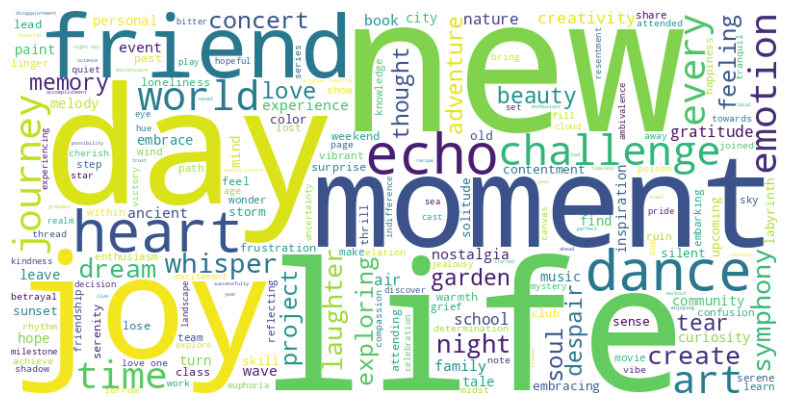

In [106]:
all_text = ' '.join(df['Text'].astype(str).apply(str.lower).tolist())

# Create word cloud object using the combined text
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

An interactive histogram was generated to explore the distribution and variability within the data.

In [135]:
fig = px.histogram(df,
             x = 'Sentiment',
             title = 'Histogram of Sentiment analysis',
             color = 'Sentiment',
             color_discrete_sequence= px.colors.sequential.Blues_r,
             height = 525,
             width = 835,
            )

fig.show()

In [131]:
df['Tokens'] = df['Text'].apply(lambda x: x.split())

# Group by sentiment and collect all tokens
grouped = df.groupby('Sentiment')['Tokens'].apply(lambda texts: [word for tokens in texts for word in tokens])

top_words_per_class = {}

for sentiment, words in grouped.items():
    counter = Counter(words)
    top_words = counter.most_common(20)
    top_words_per_class[sentiment] = top_words


<ipython-input-129-bcdacf26473d>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




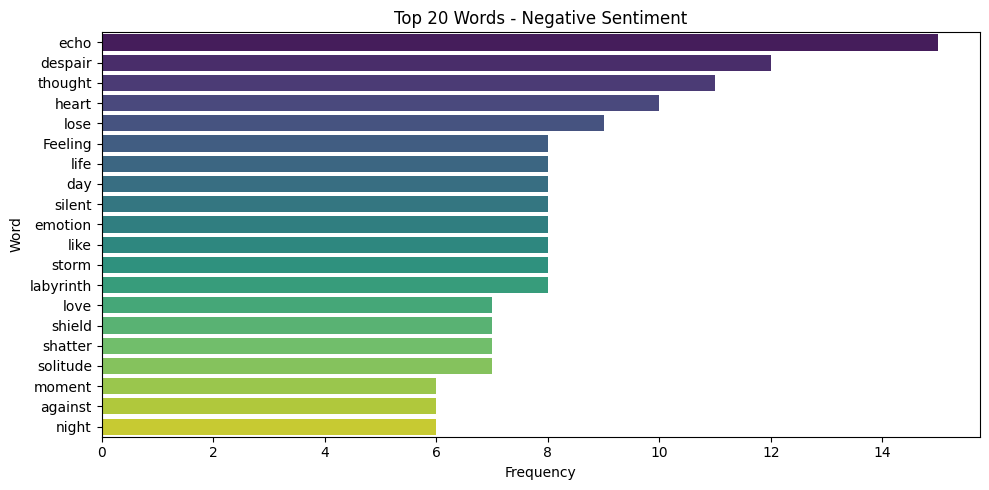

<ipython-input-129-bcdacf26473d>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




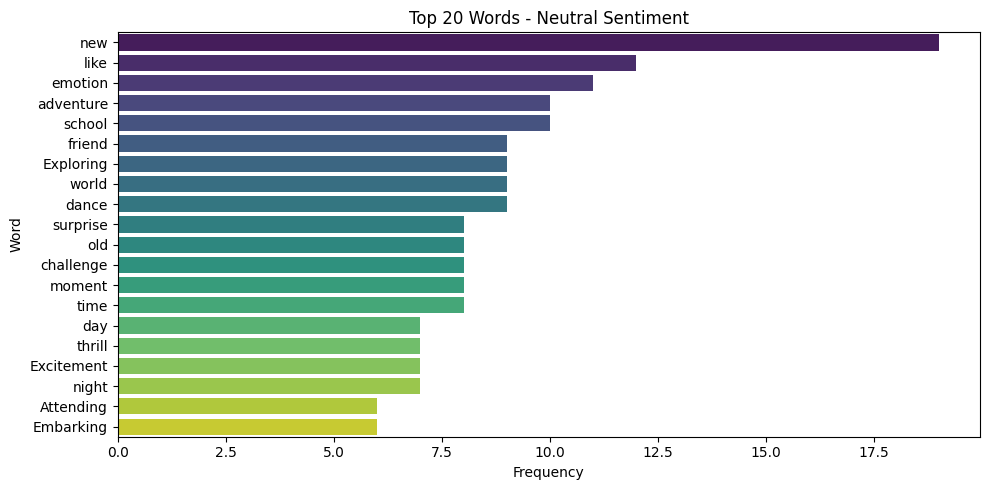

<ipython-input-129-bcdacf26473d>:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




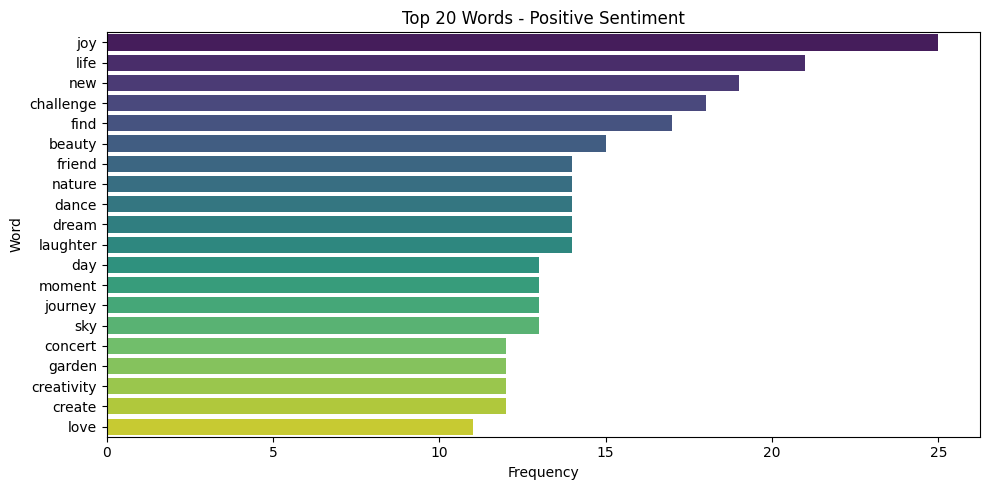

In [129]:
# Plot top 20 words per sentiment
for sentiment, top_words in top_words_per_class.items():
    plt.figure(figsize=(10, 5))
    sns.barplot(
        x=[freq for _, freq in top_words],
        y=[word for word, _ in top_words],
        palette='viridis'
    )
    plt.title(f"Top 20 Words - {sentiment.title()} Sentiment")
    plt.xlabel("Frequency")
    plt.ylabel("Word")
    plt.tight_layout()
    plt.show()

# Data is split into training and testing sets, and the model is trained on the training set.

In [110]:
x_train, x_test, y_train, y_test = train_test_split(tfidf_df, df['Sentiment'], test_size=0.2, random_state=42)

In [111]:
r = RandomForestClassifier()
r.fit(x_train, y_train)

RandomForestClassifier()

In [112]:
y_pred_r = r.predict(x_test)
accuracy_score(y_test, y_pred_r)

0.5850340136054422

In [113]:
report_dict_r = classification_report(y_test, y_pred_r, output_dict=True)

report_df_r = pd.DataFrame(report_dict_r).T

print(report_df_r)

              precision    recall  f1-score     support
negative       0.842105  0.372093  0.516129   43.000000
neutral        0.600000  0.230769  0.333333   39.000000
positive       0.539823  0.938462  0.685393   65.000000
accuracy       0.585034  0.585034  0.585034    0.585034
macro avg      0.660643  0.513775  0.511619  147.000000
weighted avg   0.644211  0.585034  0.542477  147.000000


In [114]:
nb = MultinomialNB()
nb.fit(x_train, y_train)

MultinomialNB()

In [115]:
y_pred_nb = nb.predict(x_test)
accuracy_score(y_test, y_pred_nb)

0.5850340136054422

In [116]:
report_dict_nb = classification_report(y_test, y_pred_nb, output_dict=True)

report_df_nb = pd.DataFrame(report_dict_nb).T

print(report_df_nb)

              precision    recall  f1-score     support
negative       0.842105  0.372093  0.516129   43.000000
neutral        0.500000  0.179487  0.264151   39.000000
positive       0.552632  0.969231  0.703911   65.000000
accuracy       0.585034  0.585034  0.585034    0.585034
macro avg      0.631579  0.506937  0.494730  147.000000
weighted avg   0.623344  0.585034  0.532310  147.000000


Applying CountVectorizer as a substitute for TF-IDF in the text vectorization process.

In [117]:
count_vectorizer = CountVectorizer()
count_matrix = count_vectorizer.fit_transform(df['Text'])

In [118]:
feature_names_count = count_vectorizer.get_feature_names_out()
count_df = pd.DataFrame(count_matrix.toarray(), columns=feature_names_count)
count_df = count_df.join(df[['happyFace','sadFace']])

In [119]:
x_train_c, x_test_c, y_train_c, y_test_c = train_test_split(count_df, df['Sentiment'], test_size=0.2, random_state=42)

In [120]:
r_c = RandomForestClassifier()
r_c.fit(x_train_c, y_train_c)

RandomForestClassifier()

In [121]:
y_pred_r_c = r_c.predict(x_test_c)
accuracy_score(y_test_c, y_pred_r_c)

0.5986394557823129

In [122]:
report_dict_r_c = classification_report(y_test_c, y_pred_r_c, output_dict=True)

report_df_r_c = pd.DataFrame(report_dict_r_c).T

print(report_df_r_c)

              precision    recall  f1-score     support
negative       0.800000  0.372093  0.507937   43.000000
neutral        0.666667  0.256410  0.370370   39.000000
positive       0.553571  0.953846  0.700565   65.000000
accuracy       0.598639  0.598639  0.598639    0.598639
macro avg      0.673413  0.527450  0.526291  147.000000
weighted avg   0.655661  0.598639  0.556615  147.000000


In [123]:
nb_c = MultinomialNB()# I got the best result by using CountVectorizer to convert text to vectors and MultinomialNB as ML model
nb_c.fit(x_train_c, y_train_c)

MultinomialNB()

In [124]:
y_pred_nb_c = nb_c.predict(x_test_c)
accuracy_score(y_test_c, y_pred_nb_c)

0.7006802721088435

In [125]:
report_dict_nb_c = classification_report(y_test_c, y_pred_nb_c, output_dict=True)

report_df_nb_c = pd.DataFrame(report_dict_nb_c).T

print(report_df_nb_c)

              precision    recall  f1-score    support
negative       0.772727  0.790698  0.781609   43.00000
neutral        0.548387  0.435897  0.485714   39.00000
positive       0.722222  0.800000  0.759124   65.00000
accuracy       0.700680  0.700680  0.700680    0.70068
macro avg      0.681112  0.675532  0.675483  147.00000
weighted avg   0.690876  0.700680  0.693164  147.00000
